In [1]:
# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, BitsAndBytesConfig
import torch

In [2]:
model_path = "/p/project/deepacf/maelstrom/ehlert1/models/falcon-40b"

In [3]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, bnb_4bit_use_double_quant=True, bnb_4bit_quant_type="nf4", bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(
    model_path, device_map="auto", trust_remote_code=False, quantization_config=bnb_config
)

tokenizer = AutoTokenizer.from_pretrained(model_path)
tokenizer.pad_token = tokenizer.eos_token

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

In [4]:
def tokenize_prompt(prompt):
    return tokenizer.encode(prompt, return_tensors="pt").cuda()

In [5]:
# Create a pipeline for text generation
text_generation_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
)

# Tweets in CSV file
skip this if you have run that once

In [2]:
import a2.utils

import a2.training.training_hugging
import a2.training.evaluate_hugging
import a2.training.dataset_hugging
import a2.plotting.analysis
import a2.plotting.histograms
import a2.dataset
import numpy as np

In [3]:
FOLDER_DATA = "/p/project/deepacf/maelstrom/haque1/dataset/"
FILE_TWEETS = FOLDER_DATA + "tweets_2017_01_era5_normed_filtered.nc"

In [4]:
ds = a2.dataset.load_dataset.load_tweets_dataset(FILE_TWEETS)

In [27]:
ds["relevance_hand"] = (["index"], np.ones_like(ds.index.values))
ds[["text", "raining", "raining_station", "relevance_hand"]].to_pandas().to_csv(
    "tweets_2017_01_era5_normed_filtered.csv"
)

In [9]:
f = open("tweets_2017_01_era5_normed_filtered.csv", "r")
file = f.read()

# Running model with different tweet numbers to check if this makes any effect with time efficiency 

In [9]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [10]:
# Define a function to generate Fibonacci numbers
def fibonacci(n):
    fib_nums = [0, 1]
    while fib_nums[-1] < n:
        fib_nums.append(fib_nums[-1] + fib_nums[-2])
    return fib_nums[1:-1]

# Read CSV data
df = pd.read_csv("tweets_2017_01_era5_normed_filtered.csv")

# Placeholder function for model.generate
def generate(input_ids, temperature, max_length):
    sample_outputs = model.generate(
        input_ids,
        temperature=0.7,
        # do_sample=True,
        max_length=max_length,
        # top_k=50,
        # top_p=0.95,
        # num_return_sequences=3
    )
    return sample_outputs


In [11]:
def print_predictions(seq, prompt, tokenizer):
    """
    Prints the prompt and predictions for each sequence in the generated output.

    Args:
    sequence (list): A list of generated sequences from the model.
    prompt (str): The original prompt used for generation.
    tokenizer: The tokenizer used for decoding the sequences.
    """
    for i, sample_output in enumerate(seq):
        prediction = tokenizer.decode(sample_output, skip_special_tokens=True)
        print(f"Prompt:\n{prompt}")
        print("---------")
        print(f"Prediction {i+1}:\n{prediction}\n")

# Example usage
# Assuming 'sequence' is your list of generated outputs and 'tokenizer' is your decoding tokenizer
# print_predictions(sequence, prompt, tokenizer)


In [35]:
# Record time for each Fibonacci number of rows
times = []
start_times = []
end_times = []
tweet_counts = []
results = ''
fib_numbers = fibonacci(len(df))
for fib_num in fib_numbers:
    if fib_num > 1:  # Limit to 1000 rows
        break
    # if fib_num < 500:  # Limit to 1000 rows
    #     continue 
    

    # Prepare the prompt with the selected number of tweets
    
    # Adjusted code to format the prompt as per the example
    prompt = """
    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.

    Tweets:
    """

    for i, row in df.iloc[:fib_num].iterrows():
        prompt += f"""Tweet {i+1}: "{row['text']}"
    """




    input_ids = tokenize_prompt(prompt)
    
    # Record the start time
    start_time = time.time()

    # Generate the sequence
    # sequence = generate(input_ids, temperature=0.7, max_length=len(input_ids))
    sequences = model.generate(
        input_ids,
        temperature=0.7,
        # do_sample=True,
        max_length=len(prompt)*3
        # top_k=50,
        # top_p=0.95,
        # num_return_sequences=3
    )

    
    # Record the end time
    end_time = time.time()

    # Calculate and store the time taken
    times.append(end_time - start_time)
    start_times.append(start_time)
    end_times.append(end_time)
    tweet_counts.append(fib_num)
    results = sequences



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


In [36]:
# Display the results
for i, sample_output in enumerate(results):
    prediction = tokenizer.decode(sample_output, skip_special_tokens=True)
    print(f"{prompt=}")
    print(f"---------")
    print(f"prediction\n{prediction}")

prompt='\n    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.\n\n    Tweets:\n    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""\n    '
---------
prediction

    Read below Tweets and tell me if they say that it is raining or sunny. It should be rainy or sunny now.

    Tweets:
    Tweet 1: "A Chinese proverb relevant today "When small people cast long shadows, the sun is setting""
    """
    Tweet 2: "The sun is setting on the American century"
    """
    Tweet 3: "The sun is setting on the American century"
    """
    Tweet 4: "The sun is setting on the American century"
    """
    Tweet 5: "The sun is setting on the American century"
    """
    Tweet 6: "The sun is setting on the American century"
    """
    Tweet 7: "The sun is setting on the American century"
    """
    Tweet 8: "The sun is setting on the American century"
    """
    Tweet 9: "The sun is setting o

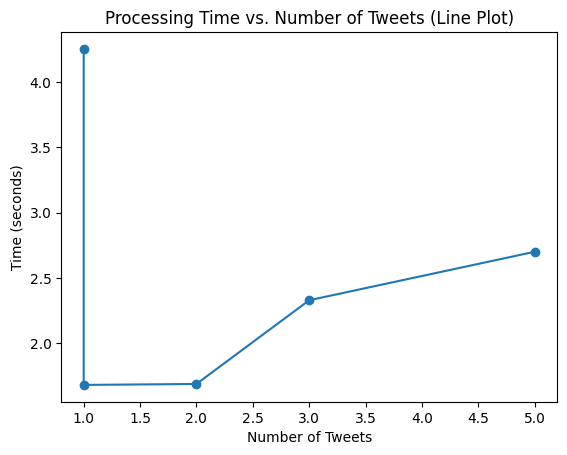

In [12]:
import matplotlib.pyplot as plt

# Plotting the line plot
plt.plot(tweet_counts, times, marker='o')
plt.xlabel('Number of Tweets')
plt.ylabel('Time (seconds)')
plt.title('Processing Time vs. Number of Tweets (Line Plot)')
plt.show()


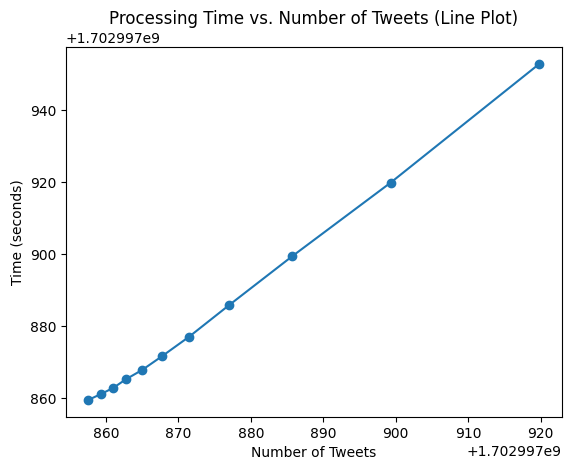

In [23]:
import matplotlib.pyplot as plt

# Plotting the line plot
plt.plot(start_times, end_times, marker='o')
plt.xlabel('Number of Tweets')
plt.ylabel('Time (seconds)')
plt.title('Processing Time vs. Number of Tweets (Line Plot)')
plt.show()
